# Table of Contents
 <p><div class="lev1"><a href="#Loading"><span class="toc-item-num">1 - </span>Loading</a></div><div class="lev1"><a href="#Tests"><span class="toc-item-num">2 - </span>Tests</a></div><div class="lev1"><a href="#Dimensions"><span class="toc-item-num">3 - </span>Dimensions</a></div><div class="lev1"><a href="#Var-/-Mean-/-Median"><span class="toc-item-num">4 - </span>Var / Mean / Median</a></div><div class="lev2"><a href="#NTCD"><span class="toc-item-num">4.1 - </span>NTCD</a></div><div class="lev2"><a href="#cNTCD"><span class="toc-item-num">4.2 - </span>cNTCD</a></div><div class="lev1"><a href="#DCT"><span class="toc-item-num">5 - </span>DCT</a></div><div class="lev2"><a href="#NTCD"><span class="toc-item-num">5.1 - </span>NTCD</a></div><div class="lev3"><a href="#Test"><span class="toc-item-num">5.1.1 - </span>Test</a></div><div class="lev2"><a href="#cNTCD"><span class="toc-item-num">5.2 - </span>cNTCD</a></div><div class="lev1"><a href="#Pval-Save"><span class="toc-item-num">6 - </span>Pval Save</a></div>

# Loading

In [1]:
%pylab inline
import Tools.ext as Te
import Tools.display as Td
import Tools.functions as Tf
from scipy.stats import ranksums

Populating the interactive namespace from numpy and matplotlib


In [2]:
TS = ['TC', 'TCHD12', 'TCDAH', 'TCHD12B', 'TCDAHB']
TP = ['g','p','c']
KS = ['p05','p06','p08','p15','p18','p19','p21',
      't03','t04','t05','t07','t08','t10','t11','t12','t13','t14','t15','t19','t20','t21']

pat, con = slice(7), slice(7,21)
T = 329  # Tmax because of p19 ?
K = 7    # number of clusters
L = 25   # subDCT

lTS, lTP, lKS, lK = range(len(TS)), range(len(TP)), range(len(KS)), range(K)

In [21]:
#DIM = 5 x 21 x 329 x 329
NTCD = zeros((5,21,T,T))
for iTS in lTS:
    tmp = Te.data2array('NTCDs/%s.npy'%TS[iTS], dic=1)
    for iKS in lKS:
        NTCD[iTS,iKS] = tmp[KS[iKS]][:T,:T]

In [81]:
#DIM = 5 x 3 x 21 x 7 x 329 x 329
cNTCD = zeros((5,3,21,K,T,T))
for iTS in lTS:
    for iTP in lTP:
        tmp = Te.data2array('cNTCDs/%s_%s.npy' %(TS[iTS],TP[iTP]), dic=1)
        for iKS in lKS:
            for ik in lK:
                cNTCD[iTS,iTP,iKS,ik] = tmp[KS[iKS]][ik][:T,:T]

# Tests
- Variance
- Mean / Median / Autocorrelation
- Frequencies
- DCT Coefficients
- Entropy

In [3]:
pvalG = Te.data2array('cNTCDs/pvalG.npy', dic=1)
pvalC = Te.data2array('cNTCDs/pvalC.npy', dic=1)

In [18]:
pvalG = {'dct':{}, 'var':{}, 'mea':{}, 'med':{}, 'ent':{}, 'freq':{}}
pvalC = {'dct':{}, 'var':{}, 'mea':{}, 'med':{}, 'ent':{}, 'freq':{}}

# Dimensions
- Time Course corrections (5)
- clustering type (3)
- clusters and global (8)
- tau (~300)

# Var / Mean / Median
- p-val on sub-diagonals

## NTCD

In [9]:
#DIM 5 x 327
pvalG['var'] = zeros((5,T-2))
pvalG['mea'] = zeros((5,T-2))
pvalG['med'] = zeros((5,T-2))
for iTS in lTS:
    vardiag = zeros((21,T-2))
    meadiag = zeros((21,T-2))
    meddiag = zeros((21,T-2))
    for iKS in lKS:
        for tau in range(T-2):
            vardiag[iKS,tau] = var( diag(NTCD[iTS,iKS,:,:], k=tau+1) )
            meadiag[iKS,tau] = mean( diag(NTCD[iTS,iKS,:,:], k=tau+1) )
            meddiag[iKS,tau] = median( diag(NTCD[iTS,iKS,:,:], k=tau+1) )
    for tau in range(T-2):
        pvalG['var'][iTS,tau] = ranksums(vardiag[pat][:,tau], vardiag[con][:,tau])[1]
        pvalG['mea'][iTS,tau] = ranksums(meadiag[pat][:,tau], meadiag[con][:,tau])[1]
        pvalG['med'][iTS,tau] = ranksums(meddiag[pat][:,tau], meddiag[con][:,tau])[1]

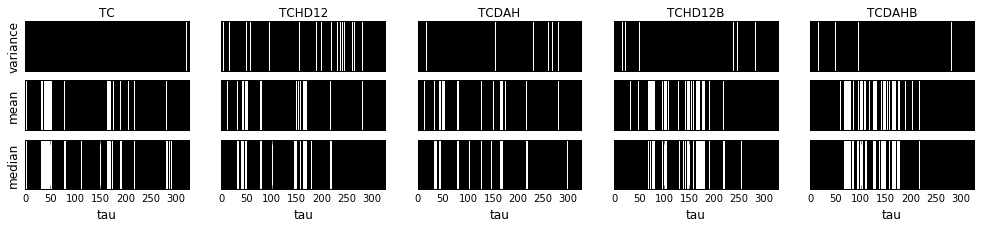

In [10]:
f, ax = subplots(3,5, figsize=(17,3))
for imet, met in zip(range(3), ['var','mea','med']):
    for iTS in lTS:
        ax[imet,iTS].imshow([pvalG[met][iTS] < 0.05], cmap='bone', interpolation='nearest', aspect='auto');
        ax[imet,iTS].set_yticks([])
        if imet != 2: ax[imet,iTS].set_xticks([])
        else:         ax[imet,iTS].set_xlabel('tau', size=12)
        if imet == 0: ax[imet,iTS].set_title(TS[iTS], size=12)
        if iTS == 0:  ax[imet,iTS].set_ylabel(['variance','mean','median'][imet], size=12)

## cNTCD

In [11]:
#DIM 5 x 3 x 7 x 327
pvalC['var'] = zeros((5,3,K,T-2))
pvalC['mea'] = zeros((5,3,K,T-2))
pvalC['med'] = zeros((5,3,K,T-2))
for iTS in lTS:
    for iTP in lTP:
        for iK in lK:
            vardiag = zeros((21,T-2))
            meadiag = zeros((21,T-2))
            meddiag = zeros((21,T-2))
            for iKS in lKS:
                for tau in range(T-2):
                    vardiag[iKS,tau] = var( diag(cNTCD[iTS,iTP,iKS,iK,:,:], k=tau+1) )
                    meadiag[iKS,tau] = mean( diag(cNTCD[iTS,iTP,iKS,iK,:,:], k=tau+1) )
                    meddiag[iKS,tau] = median( diag(cNTCD[iTS,iTP,iKS,iK,:,:], k=tau+1) )
            for tau in range(T-2):
                pvalC['var'][iTS,iTP,iK,tau] = ranksums(vardiag[pat][:,tau], vardiag[con][:,tau])[1]
                pvalC['mea'][iTS,iTP,iK,tau] = ranksums(meadiag[pat][:,tau], meadiag[con][:,tau])[1]
                pvalC['med'][iTS,iTP,iK,tau] = ranksums(meddiag[pat][:,tau], meddiag[con][:,tau])[1]

color|Black|Red|Green|Blue|Yellow|Cyan|Violet|White
:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:
clusters from|None|global|patients |controls|global & patients|patients & controls|global & controls|All

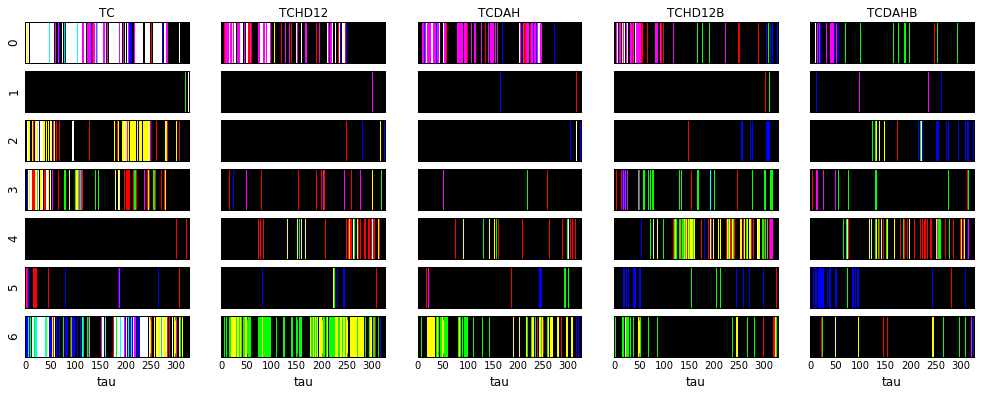

In [12]:
# VARIANCE
f, ax = subplots(7,5, figsize=(17,6))
for iK in lK:
    for iTS in lTS:
        ax[iK,iTS].imshow([pvalC['var'][iTS,:,iK,:].T < 0.05], cmap='bone', interpolation='nearest', aspect='auto');
        ax[iK,iTS].set_yticks([])
        if iK != K-1: ax[iK,iTS].set_xticks([])
        else:         ax[iK,iTS].set_xlabel('tau', size=12)
        if iK == 0:   ax[iK,iTS].set_title(TS[iTS], size=12)
        if iTS == 0:  ax[iK,iTS].set_ylabel(iK, size=12)

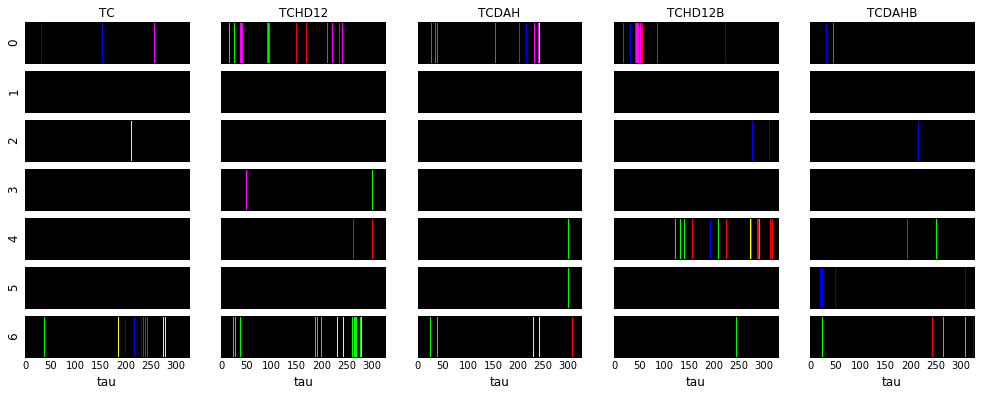

In [5]:
# VARIANCE
f, ax = subplots(7,5, figsize=(17,6))
for iK in lK:
    for iTS in lTS:
        ax[iK,iTS].imshow([pvalC['var'][iTS,:,iK,:].T < (0.05/7)], cmap='bone', interpolation='nearest', aspect='auto');
        ax[iK,iTS].set_yticks([])
        if iK != K-1: ax[iK,iTS].set_xticks([])
        else:         ax[iK,iTS].set_xlabel('tau', size=12)
        if iK == 0:   ax[iK,iTS].set_title(TS[iTS], size=12)
        if iTS == 0:  ax[iK,iTS].set_ylabel(iK, size=12)

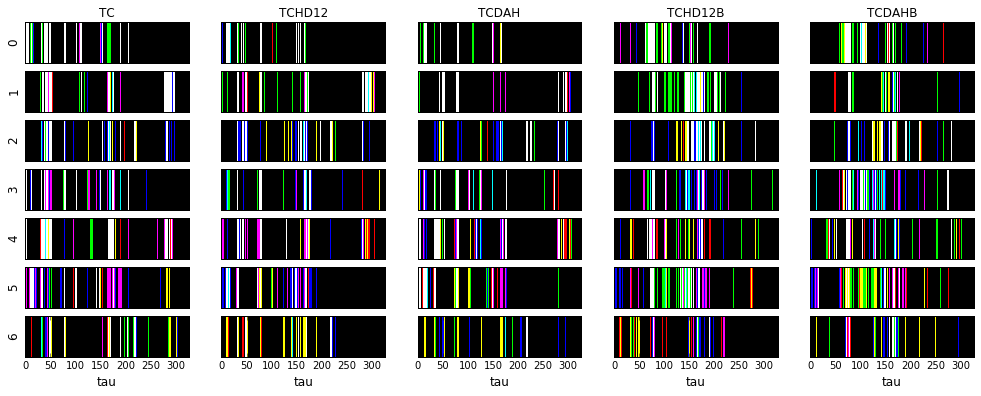

In [13]:
# MEAN 
f, ax = subplots(7,5, figsize=(17,6))
for iK in lK:
    for iTS in lTS:
        ax[iK,iTS].imshow([pvalC['mea'][iTS,:,iK,:].T < 0.05], cmap='bone', interpolation='nearest', aspect='auto');
        ax[iK,iTS].set_yticks([])
        if iK != K-1: ax[iK,iTS].set_xticks([])
        else:         ax[iK,iTS].set_xlabel('tau', size=12)
        if iK == 0:   ax[iK,iTS].set_title(TS[iTS], size=12)
        if iTS == 0:  ax[iK,iTS].set_ylabel(iK, size=12)

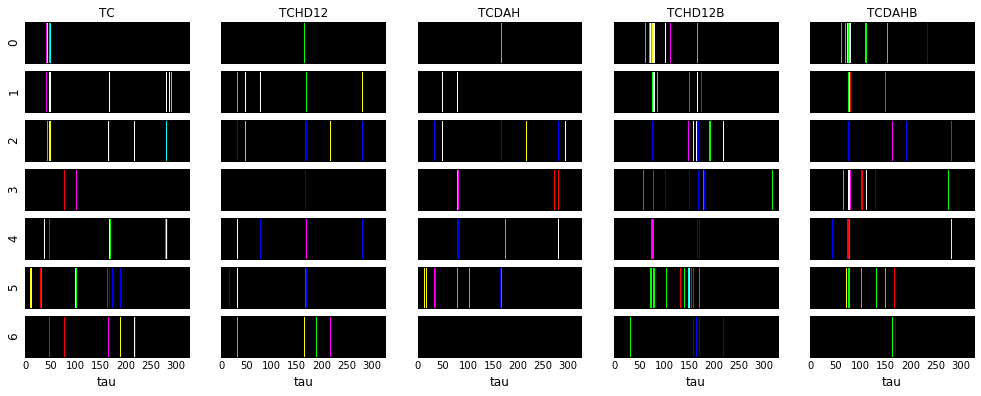

In [6]:
# MEAN 
f, ax = subplots(7,5, figsize=(17,6))
for iK in lK:
    for iTS in lTS:
        ax[iK,iTS].imshow([pvalC['mea'][iTS,:,iK,:].T < (0.05/7)], cmap='bone', interpolation='nearest', aspect='auto');
        ax[iK,iTS].set_yticks([])
        if iK != K-1: ax[iK,iTS].set_xticks([])
        else:         ax[iK,iTS].set_xlabel('tau', size=12)
        if iK == 0:   ax[iK,iTS].set_title(TS[iTS], size=12)
        if iTS == 0:  ax[iK,iTS].set_ylabel(iK, size=12)

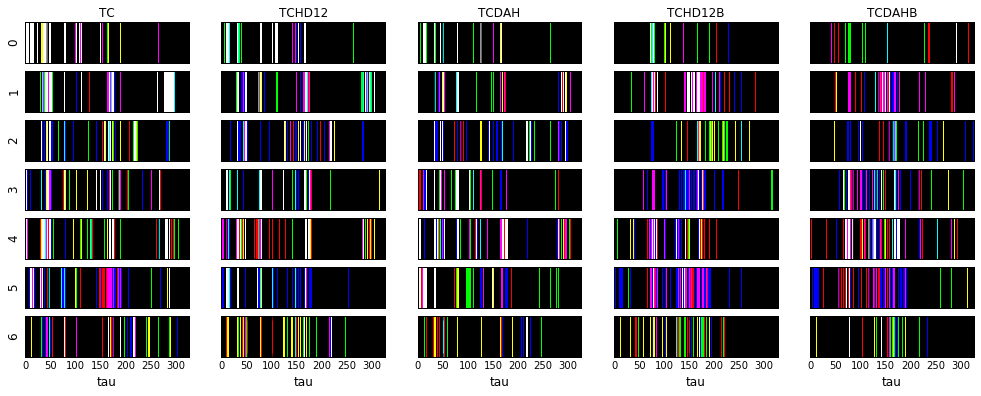

In [14]:
# MEDIAN 
f, ax = subplots(7,5, figsize=(17,6))
for iK in lK:
    for iTS in lTS:
        ax[iK,iTS].imshow([pvalC['med'][iTS,:,iK,:].T < 0.05], cmap='bone', interpolation='nearest', aspect='auto');
        ax[iK,iTS].set_yticks([])
        if iK != K-1: ax[iK,iTS].set_xticks([])
        else:         ax[iK,iTS].set_xlabel('tau', size=12)
        if iK == 0:   ax[iK,iTS].set_title(TS[iTS], size=12)
        if iTS == 0:  ax[iK,iTS].set_ylabel(iK, size=12)

# DCT
- p-val on the L\*L sub DCT

## cNTCD

In [17]:
#DIM = 5 x 3 x 21 x 7 x 25 x 25
cDCT = zeros((5,3,21,K,L,L))
for iTS in lTS:
    for iTP in lTP:
        for iKS in lKS:
            for iK in lK:
                cDCT[iTS,iTP,iKS,iK] = Tf.dct2D(cNTCD[iTS,iTP,iKS,iK])[:L,:L]

In [ ]:
#DIM = 5 x 3 x 7 x 25 x 25
pvalC['dct'] = zeros((5,3,K,L,L))
for iTS in lTS:
    for iTP in lTP:
        for iK in lK:
            for i in range(L):
                for j in range(L):
                    pvalC['dct'][iTS,iTP,iK,i,j] = ranksums(cDCT[iTS,iTP,:,iK,i,j][pat], 
                                                            cDCT[iTS,iTP,:,iK,i,j][con])[1]

color|Black|Red|Green|Blue|Yellow|Cyan|Violet|White
:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:
clusters from|None|global|patients |controls|global & patients|patients & controls|global & controls|All

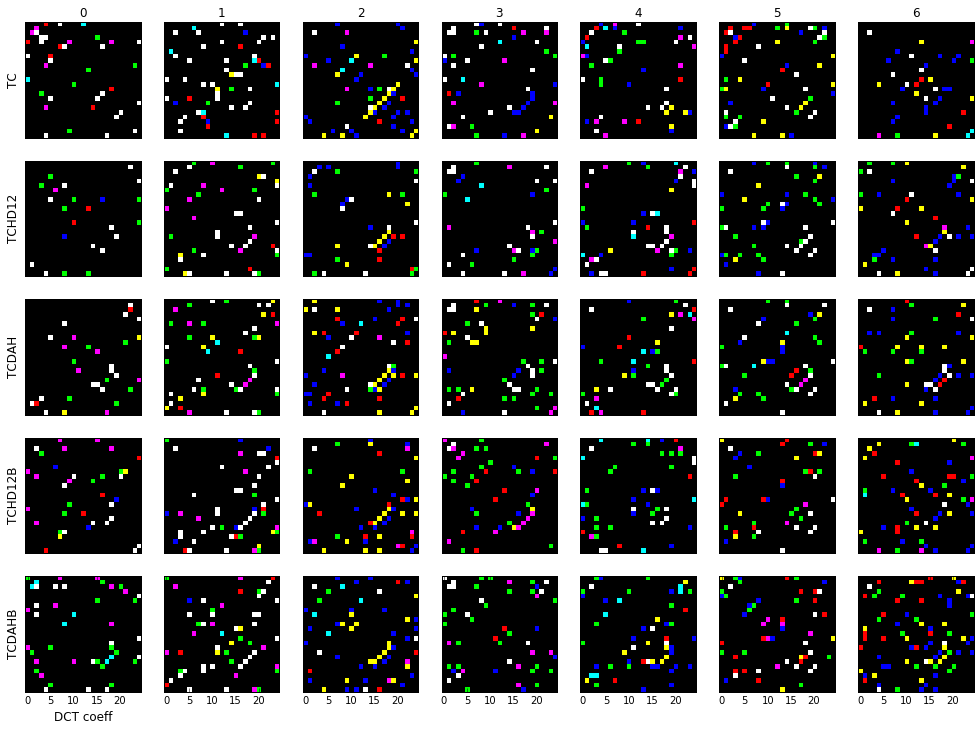

In [13]:
f, ax = subplots(5,7, figsize=(17,12))
for iTS in lTS:
    for iK in lK:
        ax[iTS,iK].imshow(pvalC['dct'][iTS,:,iK,:].T < 0.05, cmap='bone', interpolation='nearest');
        ax[iTS,iK].set_yticks([])
        if iTS != 4: ax[iTS,iK].set_xticks([])
        if iTS == 4: ax[iTS,0].set_xlabel('DCT coeff', size=12)
        if iTS == 0: ax[iTS,iK].set_title(iK, size=12)
        if iK == 0:  ax[iTS,iK].set_ylabel(TS[iTS], size=12)

# Pval Save

In [15]:
Te.array2data(pvalG, 'cNTCDs/pvalG.npy')
Te.array2data(pvalC, 'cNTCDs/pvalC.npy')